# Temas Tratados en el Trabajo Práctico 6

* Modelado de problemas en espacios de estado.

* Algoritmos de planificación hacia adelante y hacia atrás.

* Representación y solución de problemas descritos en lenguaje STRIPS.

* Algoritmo GRAPHPLAN.

* Planificación con restricciones de tiempo y recursos.

* Caminos críticos y tiempos de relajación.

# Ejercicios Teóricos

## 1. ¿En qué tipo de algoritmos se basa un planificador para encontrar el mejor camino a un estado solución?

Para que un planificador encuentre el mejor camino a un estado solución, lo que hace en realidad es aplicar algoritmos de búsqueda en espacios de estados. 

Esto significa que no “razona” en abstracto, sino que explora las posibles configuraciones del mundo (los estados) y las transiciones entre ellos (las acciones) hasta construir una secuencia que conecte el estado inicial con el objetivo. 

En la práctica, el planificador se comporta como un agente que navega un grafo: cada nodo representa un estado y cada arista una acción disponible. La búsqueda puede ser más o menos inteligente dependiendo de la estrategia usada: si es ciega, prueba todos los caminos sin priorizar; si es informada, utiliza heurísticas para acercarse de manera más directa a la meta. Lo fundamental es que, a diferencia de ejecutar acciones al azar, el planificador construye un plan óptimo (o lo más óptimo posible) evaluando costos, restricciones y orden de las acciones antes de ejecutarlas.



## 2. ¿Qué tres elementos se encuentran dentro de una acción formulada en lenguaje STRIPS? Describa brevemente qué función cumple cada uno.

STRIPS (Stanford Research Institute Problem Solver) define las acciones con:

Precondiciones: lo que debe cumplirse en el estado actual para que la acción sea aplicable.

Efectos: lo que cambia en el estado cuando se ejecuta la acción (agregar o eliminar condiciones).

### Planificación hacia adelante (progresión)
Empiezo desde el estado inicial y aplico acciones una tras otra hasta llegar al objetivo. El problema es que se consideran muchas acciones irrelevantes y eso lo hace poco eficiente.

### Planificación hacia atrás (regresión)
En vez de arrancar del inicio, parto del estado objetivo y busco qué acciones pudieron haberlo generado. Esto es más práctico porque me concentro en acciones relevantes y consistentes para llegar al objetivo.

### Planificación parcialmente ordenada (POP)
No obligo a un orden lineal de todas las acciones, sino que trabajo con sub-objetivos independientes y después los combino en un plan. Así se gana flexibilidad y se evitan pasos innecesarios.

## 3. Describa las ventajas y desventajas de desarrollar un algoritmo de planificación hacia adelante y hacia atrás en el espacio de estados.


| **Criterio**         | **Planificación hacia adelante (progresión)**                                                                                     | **Planificación hacia atrás (regresión)**                                                                                                                                      |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Punto de partida** | Estado inicial                                                                                                                    | Estado objetivo                                                                                                                                                                |
| **Ventajas**         | - Sencilla de implementar y entender.<br>- Siempre genera estados alcanzables.<br>- Imita la ejecución real de un agente.         | - Se centra en las condiciones del objetivo.<br>- Evita explorar muchos estados irrelevantes.<br>- Más eficiente cuando el objetivo está bien definido.                        |
| **Desventajas**      | - Puede generar gran cantidad de estados irrelevantes.<br>- Ineficiente sin heurísticas.<br>- Puede perderse en espacios enormes. | - Difícil garantizar que las precondiciones regresadas sean alcanzables.<br>- Manejo complejo de condiciones negativas o dependencias.<br>- Menos intuitiva que la progresión. |


## 4. Considere el problema de ponerse uno mismo zapatos y medias. Aplique GRAPHPLAN a este problema y muestre la solución obtenida. Muestre el plan de orden parcial que es solución e indique cuántas linealizaciones diferentes existen para el plan de orden parcial.

**Estado inicial del problema**

- $\neg Puesto (Media Derecha)$  
- $\neg Puesto (Media Izquierda)$  
- $\neg Puesto (Zapato Derecho)$  
- $\neg Puesto (Zapato Izquierdo)$  

**Objetivo →**  $Puesto (Zapato Derecho) ∧ Puesto (Zapato Izquierdo)$

**Posibles Acciones**
- $Poner(MediaDer)$
- $Ponder(MediaIzq)$
- $Poner(ZapaDer)$
- $Poner(ZapaIzq)$

**Relaciones de Precedencia**

$Poner(MediaDer) < Poner(ZapaDer)$
$Poner(MediaIzq) < Poner(ZapaIzq)$

El grafo de planificacion resulta:

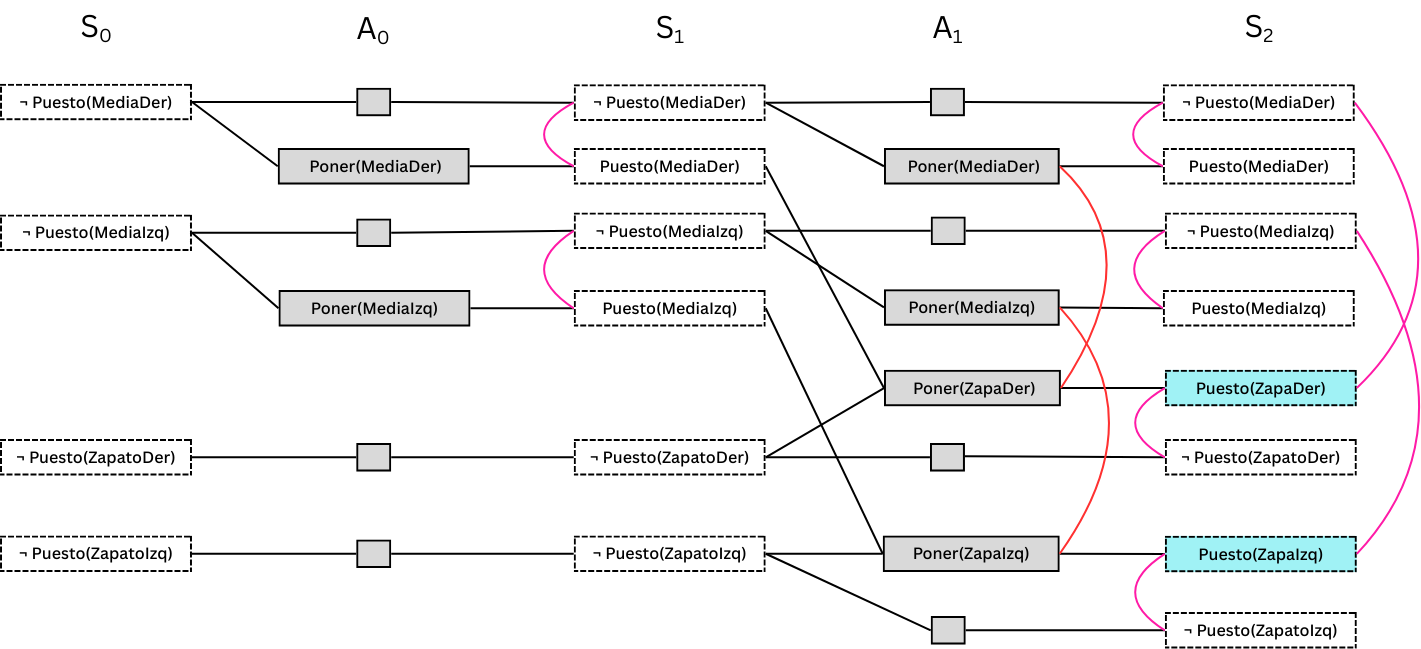

**Plan de Orden Parcial**

![TP6 ej4_POP.png](<attachment:TP6 ej4_POP.png>)

Como hay 4 acciones posibles, con 2 precedencias que se deben cumplir, la cantidad de linealizaciones diferentes que existen para el Plan de Orden Parcial se pueden calcular como una combinacion de 4 elementos tomados de a 2. Es decir la cantidad de formas distintas de elegir grupos de 2, sin importar el orden, dentro de un grupo de 4, respetando que, siempre que se forme un grupo de 2 se volverá una secuencia de 4 al agregar las relaciones de precedencia, en las que sí importa el orden.

Cálculo del número combinatorio:

$\binom{4}{2} = \frac{4!}{2!(4-2)!} = \frac{24}{4} = 6$


Entonces, hay 6 linealizaciones posibles pars el Plan de Orden parcial de este problema.

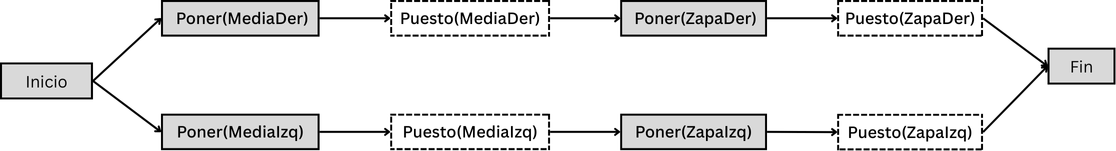

## 5. Se requiere ensamblar una máquina cuyas piezas están identificadas con las letras A, B, C, D y E. El tiempo que se tarda en ensamblar cada pieza es:

* A: 2 semanas

* B: 1 semana

* C: 4 semanas

* D: 3 semanas

* E: 5 semanas

    El orden de ensamblaje de cada pieza requiere que:

* A esté realizado antes que C

* B esté realizado antes que C

* B esté realizado antes que D

* C esté realizado antes que E

* D esté realizado antes que E

    Con esta información:

### 5.1 Arme el Plan de Orden Parcial.

![alt text](Imagenes/TP6E5_1.png)

### 5.2 Encuentre el Camino Crítico.

##### **Camino crítico**

El camino crítico en planificación es la secuencia de acciones más larga y restrictiva dentro del plan, la que determina la duración mínima necesaria para llegar al estado objetivo.

El camino crítico será la rama que no puede comprimirse, es decir, aquella secuencia de pasos encadenados que fija el tiempo mínimo total.

En este caso:

$\text{Inicio} \ \to \ A \ \to \ C \ \to \ D \ \to \ \text{Fin}$

Duración total del proyecto: **11 semanas**.


### 5.3 Encuentre los tiempos de relajación.


##### Tiempos de relajación u «Holguras»

* Holgura total (o relajación total): es el tiempo que una tarea puede retrasarse sin afectar la duración total del proyecto (o sea, sin retrasar la fecha de finalización).

* Holgura libre (o relajación libre): es el tiempo que una tarea puede retrasarse sin afectar la fecha de inicio de la siguiente tarea inmediata.

##### ¿Cómo se calculan?

* Hacia adelante (forward pass): se obtienen los tiempos más tempranos (ES = Early Start, EF = Early Finish).

* Hacia atrás (backward pass): se obtienen los tiempos más tardíos (LS = Late Start, LF = Late Finish).

* Holgura total:

$$HT=LS−ES=LF−EF$$

* Holgura libre:

$$HL=min⁡(ES_{\text{sucesores}})−EF$$

##### Interpretación

Las tareas en el camino crítico tienen holgura cero: no hay margen de relajación, si se retrasan el proyecto entero se retrasa.

Las tareas fuera del camino crítico sí tienen holgura: pueden “relajarse” unos días sin consecuencias graves para la fecha final.

##### Cálculo rápido (ES/EF y holguras)

| Tarea | Predecesoras | Duración | ES | EF | LS | LF | Holgura |
| ----- | ------------ | -------: | -: | -: | -: | -: | ------: |
| A     | —            |        2 |  0 |  2 |  0 |  2 |   **0** |
| B     | —            |        1 |  0 |  1 |  1 |  2 |       1 |
| C     | A, B         |        4 |  2 |  6 |  2 |  6 |   **0** |
| D     | B            |        3 |  1 |  4 |  3 |  6 |       2 |
| E     | C, D         |        5 |  6 | 11 |  6 | 11 |   **0** |

* **ES/EF**: avance hacia adelante.

  * C empieza cuando están A y B: `ES_C = max(EF_A=2, EF_B=1) = 2`.
  * D empieza tras B: `ES_D = EF_B = 1`.
  * E empieza cuando están C y D: `ES_E = max(EF_C=6, EF_D=4) = 6`.

* **LS/LF**: retroceso desde el final (11).

  * `LF_E=11 → LS_E=6`;
  * `LF_C = LS_E = 6 → LS_C=2`;
  * `LF_D = LS_E = 6 → LS_D=3`;
  * Para B, que alimenta C y D: `LF_B = min(LS_C=2, LS_D=3) = 2 → LS_B=1`;
  * Para A: `LF_A = LS_C = 2 → LS_A=0`.

La rama con D termina en la semana 4, pero E no puede empezar hasta que **C** termine en 6, así que D acumula **holgura 2**. Lo mismo B tiene **holgura 1** antes de C. Las tareas con holgura cero (A, C, E) definen el **camino crítico**.

### 5.4 Dibuje un diagrama temporal indicando las tareas y los tiempos de relajación encontrados.

# Ejercicios de Implementación

## 6. Suponga que tiene un robot de oficina capaz de moverse y tomar y depositar objetos. El robot solo puede tener un objeto a la vez, pero puede conseguir una *caja* en la que depositar varios objetos. Suponga que programa al robot para *ir a la tienda* a comprarle un *café* y en el camino de vuelta tome una *carta* del *buzón* de la oficina para para que se la traiga junto con el café. Describa en lenguaje STRIPS:


### 6.1 El dominio del robot (nombre, predicados y acciones que puede hacer el robot).

### 6.2 El problema que se quiere resolver (estado inicial, estado objetivo y objetos del mundo representados).


### 6.3 Introduzca el código desarrollado en los puntos anteriores en el [planificador online](http://lcas.lincoln.ac.uk/fast-downward/) y obtenga el plan de acción que tomará el robot para cumplir lo solicitado.


# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)